In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("F:/AI using Python/SQL/dataset/dataset/classification/Hotel Reservation - Classification/Hotel Reservations.csv") 

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
objectdt=df.dtypes==object
np.where(objectdt==1)

(array([ 0,  5,  7, 12, 18], dtype=int64),)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
# Label Encoding for Categorical Values(dtype = object)

df.type_of_meal_plan = df.type_of_meal_plan.map({'Meal Plan 1':1,'Not Selected':0,'Meal Plan 2':2,'Meal Plan 3':3}) 
df.room_type_reserved = df.room_type_reserved.map({'Room_Type 1':1,'Room_Type 4':2,'Room_Type 6':3,'Room_Type 2':4,'Room_Type 5':5,'Room_Type 7':6,'Room_Type 3':7})
df.market_segment_type = df.market_segment_type.map({'Online':0,'Offline':1,'Corporate':2,'Complementary':3,'Aviation':4})
df.booking_status = df.booking_status.map({'Not_Canceled':0,'Canceled':1})



In [6]:
df.drop('Booking_ID',axis = 1,inplace = True)

In [8]:
#Feature Extraction

X = df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [9]:
# Feature Selection 

np.set_printoptions(formatter={'float_kind':'{:f}'.format})
from sklearn.feature_selection import f_classif
s,v = f_classif(X,y)
print(s)

print(np.where(s>50))

[276.133767 39.731293 137.995720 316.434859 88.643447 271.448581 3.571266
 8636.863036 1208.037136 4.577559 4.098465 683.635048 422.379313 41.309877
 131.842414 752.582603 2482.040462]
(array([ 0,  2,  3,  4,  5,  7,  8, 11, 12, 14, 15, 16], dtype=int64),)


In [10]:
#Best Feature Extraction

X = df.iloc[:,[ 0,  2,  3,  4,  5,  7,  8, 11, 12, 14, 15, 16]].values

In [68]:
print(X.shape)
print(y.shape)

(36275, 12)

In [127]:
df.booking_status.value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

In [11]:
# Balanced the sample 

from imblearn.over_sampling import SMOTE
smt = SMOTE()
X,y=smt.fit_resample(X,y)

In [12]:
X.shape

(48780, 12)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

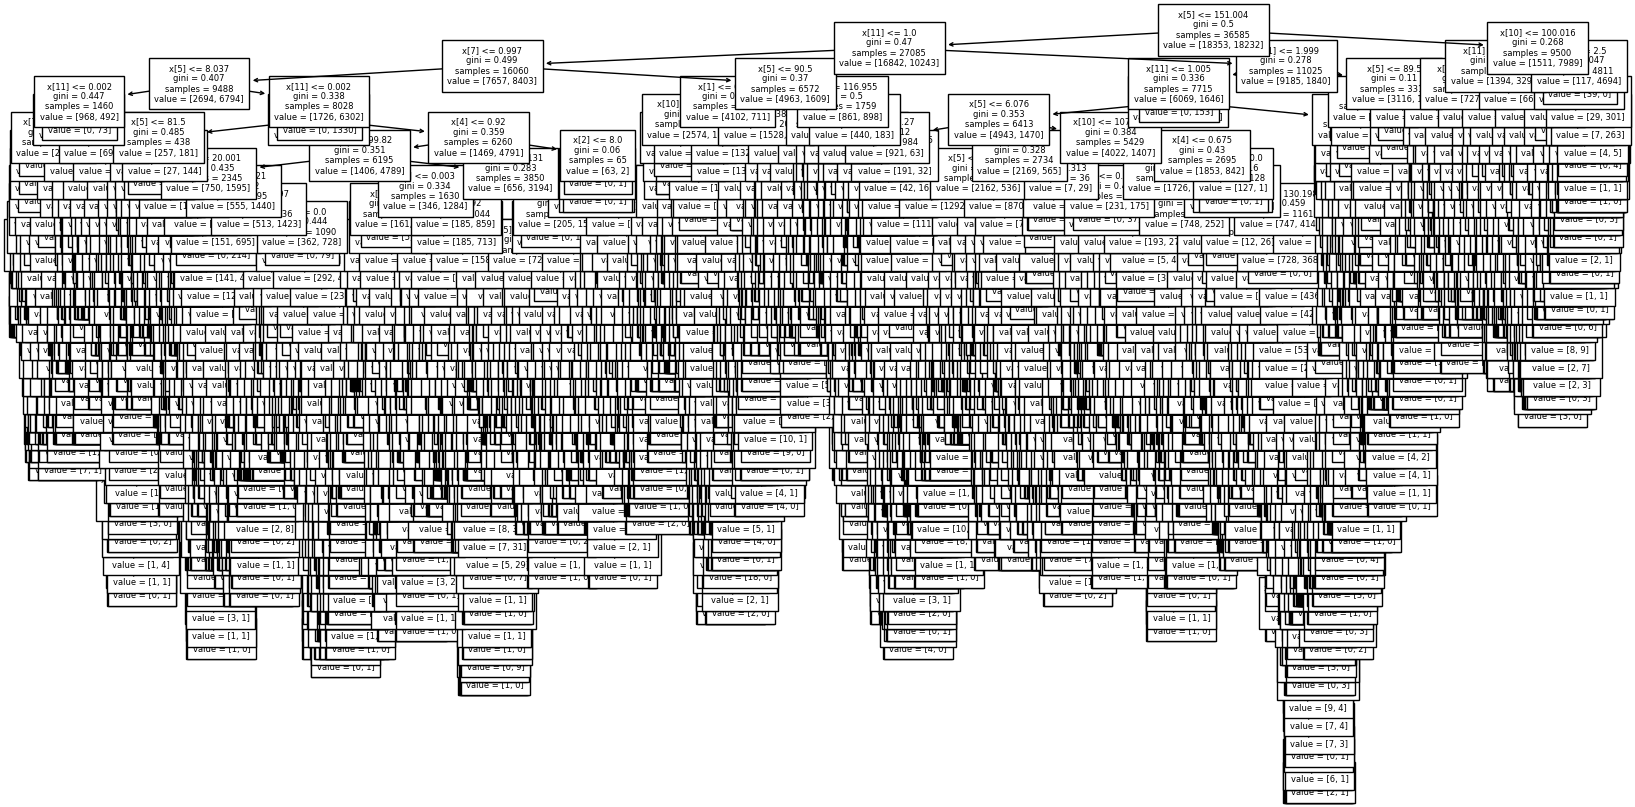

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

plt.figure(figsize=(20,10))
plot_tree(model_tree, fontsize = 6)
plt.show()

In [18]:
model_tree.score(X_test,y_test)

0.8938909389093891

In [117]:
#Scaling

sc = MinMaxScaler()
X_sc=sc.fit_transform(X)

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X_sc,y)

In [120]:
model_logreg = LogisticRegression(multi_class = 'multinomial',max_iter = 200)
model_logreg.fit(X_train,y_train)
print(model_logreg.score(X_train,y_train))

print(model_logreg.coef_)

print(model_logreg.intercept_)

0.7783517835178352
[[-0.065109 0.556268 0.324964 -0.301728 -0.750782 3.057490 0.307506
  -2.149458 -0.730906 -0.223607 4.277909 -3.711192]]
[-1.136140]


In [121]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
print(model_knn.score(X_train,y_train))

0.9116851168511685


In [122]:
print(model_knn.score(X_test,y_test))
print(model_logreg.score(X_test,y_test))

0.8698646986469865
0.7795817958179582


In [123]:
pred_logreg = model_logreg.predict(X_test)

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_logreg)
print(cm)

[[4677 1381]
 [1307 4830]]


In [125]:
pred_knn = model_knn.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_knn)
print(cm)

[[5313  745]
 [ 842 5295]]
